# Домашнее задание по библиотеке Pandas

## 📝 Описание данных


**Таблица Pays** (файл pays.csv) содержит данные о платежах между компаниями:

| **Название признака**         | **Описание** |
|------------------|-------------|
| *hash_inn_kt*   | Обезличенный ИНН отправителя |
| *hash_inn_dt*   | Обезличенный ИНН получателя |
| *week*          | Неделя |
| *count*         | Кол-во платежей в неделю |
| *sum*           | Сумма платежей в неделю (обезличенная) |


**Таблица inn_info_public** (файл inn_info_public.csv) содержит характеристики отдельных компаний:  

| **Название признака**         | **Описание** |
|------------------|-------------|
| *hash_inn*      | Обезличенный ИНН |
| *okved2*        | Обезличенная отрасль (ОКВЭД)|
| *region*        | Обезличенный регион |
| *is_public*     | Флаг публичной компании (True, если да) |

## 💫 Приступаем к работе

Теперь можно начинать! Импорт библиотеки pandas уже записан, для выполнения заданий достаточно только её, ~но если Вам захочется импортировать что-то ещё - это не возбраняется:)~.

Далее прочитайте файл удобным способом и выполняйте задания по порядку, код можно писать непосредственно сразу после условия задач, в отведённых под это ячейках.

*Совет (особенно для последних заданий): первым делом вдумайтесь в условие и прикиньте схему решения - какие таблицы Вам понадобятся, нужно ли что-то сгруппировать/объединить, по каким полям и с какими агрегирующими функциями... И только после этого приступайте к реализации задуманного на Python.*



In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pays_data = pd.read_csv('./pays.csv')
inn_info_public = pd.read_csv('./inn_info_public.csv')

### Задание 1

Выведите размерность (количество строк и столбцов) и первые 3 строки для каждой таблицы.

In [5]:
print("Pays", pays_data.shape)
display(pays_data.head(3))

print("Inn info public", inn_info_public.shape)
display(inn_info_public.head(3))

Pays (5430150, 5)


,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.6
1,0,0,5,2,399.6
2,0,0,7,2,79.6


Inn info public (240069, 4)


,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False


### Задание 2
Посчитайте количество пропусков в каждой таблице по столбцам.

In [6]:
print("Pays:")
display(pays_data.isnull().sum())

print("\nInn info public:")
display(inn_info_public.isnull().sum())

Pays:


hash_inn_kt       0
hash_inn_dt       0
week              0
count             0
sum            1125
dtype: int64


Inn info public:


hash_inn     0
okved2       0
region       0
is_public    0
dtype: int64

### Задание 3
Определите количество уникальных компаний в таблице **pays** (как отправителей, так и получателей).

In [7]:
unique_companies = pd.concat([pays_data['hash_inn_kt'], pays_data['hash_inn_dt']]).nunique()
print("Уникальных компаний в pays:", unique_companies)

Уникальных компаний в pays: 240071


### Задание 4

Найдите сумму и среднее количество платежей по неделям.

In [8]:
pays_data.groupby('week')['count'].agg(['sum', 'mean'])

,sum,mean
week,,
0,7232,3.111876
1,707513,2.963132
2,697729,2.885157
3,698557,2.884061
4,702679,2.844992
5,705049,2.891892
6,718498,2.941530
7,475101,2.707992
8,814890,2.962353


### Задание 5

Определите 5 компаний (по `hash_inn_kt`), которые отправили наибольшую сумму платежей за весь период.

In [9]:
pays_data.groupby('hash_inn_kt')['sum'].sum().nlargest(5)

hash_inn_kt
81966     3.340752e+07
85582     1.882592e+07
217993    1.508303e+07
47570     1.458800e+07
196987    1.394582e+07
Name: sum, dtype: float64

### Задание 6

По данным таблицы **inn_info_public** исследуйте распределение ОКВЭДов (подсчитайте для каждого типа ОКВЭДа сколько компаний из таблицы к нему относятся). Визуализируйте распределение *(поможет метод `hist`)*.

okved2
-1     78654
 12    44918
 34    13654
 14    10179
 4      7617
       ...  
 2        90
 36       84
 13       68
 73       64
 1        50
Name: count, Length: 81, dtype: int64

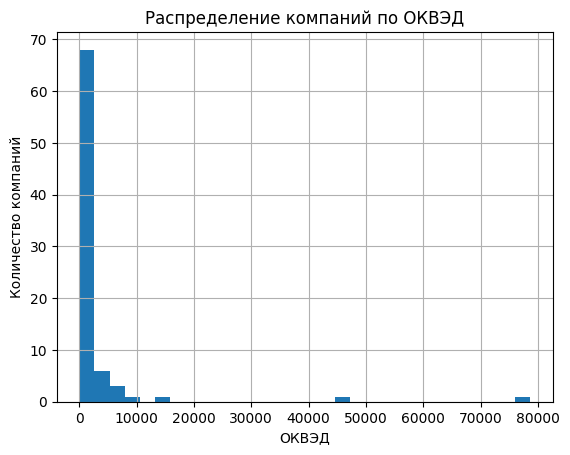

In [13]:
okved_dist = inn_info_public['okved2'].value_counts()
display(okved_dist)
ax = okved_dist.hist(bins=30)
ax.set_title('Распределение компаний по ОКВЭД')
ax.set_xlabel('ОКВЭД')
ax.set_ylabel('Количество компаний')
plt.show()

### Задание 7

Добавьте в таблицу Pays информацию об ОКВЭДе и регионе отправителя (`hash_inn_kt`) и получателя (`hash_inn_dt`).

*Подсказка: здесь нужно поработать с двумя таблицами одновременно*

In [14]:
pays_extended = pays_data.merge(
    inn_info_public[['hash_inn', 'okved2', 'region']],
    left_on='hash_inn_kt', right_on='hash_inn', how='left'
).rename(columns={'okved2': 'okved2_kt', 'region': 'region_kt'}).drop(columns='hash_inn')

pays_extended = pays_extended.merge(
    inn_info_public[['hash_inn', 'okved2', 'region']],
    left_on='hash_inn_dt', right_on='hash_inn', how='left'
).rename(columns={'okved2': 'okved2_dt', 'region': 'region_dt'}).drop(columns='hash_inn')

pays_extended.head()

,hash_inn_kt,hash_inn_dt,week,count,sum,okved2_kt,region_kt,okved2_dt,region_dt
0,0,0,1,4,38399.6,-1,84,-1.0,84.0
1,0,0,5,2,399.6,-1,84,-1.0,84.0
2,0,0,7,2,79.6,-1,84,-1.0,84.0
3,0,0,9,2,239.6,-1,84,-1.0,84.0
4,0,0,12,2,79.6,-1,84,-1.0,84.0


### Задание 8


Используя результат, полученный в предыдущем задании, создайте таблицу, в которой для каждой отрасли (ОКВЭДа) указана сумма платежей, отправленных компаниями из этой отрасли.

In [15]:
pays_extended.groupby('okved2_kt')['sum'].sum().sort_values(ascending=False)

okved2_kt
-1     6.768533e+08
 12    4.508169e+08
 4     1.252611e+08
 39    7.638264e+07
 52    6.224630e+07
           ...     
 63    8.204101e+04
 51    8.119292e+04
 13    8.033814e+04
 1     4.062196e+04
 66    3.808280e+04
Name: sum, Length: 81, dtype: float64

### Задание 9
Определите, какую долю от общего объема составляют платежи, где отправитель и получатель находятся в разных регионах.

In [17]:
cross_region = pays_extended[pays_extended['region_kt'] != pays_extended['region_dt']]['sum'].sum()
total = pays_extended['sum'].sum()

print(f"Доля межрегиональных платежей: {cross_region / total:.4f} ({cross_region / total * 100:.2f}%)")

Доля межрегиональных платежей: 0.3445 (34.45%)


### Задание 10
Определите среднюю сумму платежей для публичных (`is_public == 1`) и непубличных компаний (`is_public == 0`).

In [18]:
pays_with_public = pays_data.merge(
    inn_info_public[['hash_inn', 'is_public']],
    left_on='hash_inn_kt', right_on='hash_inn', how='left'
).drop(columns='hash_inn')

pays_with_public.groupby('is_public')['sum'].mean()

is_public
False    395.533365
True     393.207246
Name: sum, dtype: float64

### Задание * (по желанию и возможностям)

Если у Вас есть свои наблюдения, дополните анализ данных.